In [41]:
# Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Carregar base de dados
df = pd.read_csv('../../datasets/high_diamond_ranked_10min.csv')

# Normalizar dados do dataframe
scaler = MinMaxScaler()

X = df.drop(['blueWins', 'gameId'], axis=1)
y = df['blueWins']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [43]:
# Dividir entre treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [44]:
# Criar o classificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), # duas camadas ocultas com 10 neurônios cada
                    max_iter=1000,               # número máximo de iterações
                    activation='relu',           # função de ativação
                    solver='adam',               # otimizador
                    random_state=42)

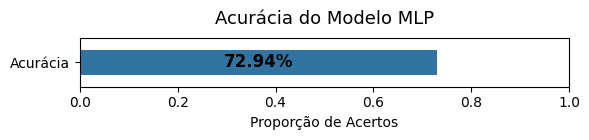

In [45]:
# Treinar o modelo
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# Calcular acurácia
acc = accuracy_score(y_test, y_pred)

# Visualização da acurácia
plt.figure(figsize=(6, 1.5))
sns.barplot(x=[acc], y=["Acurácia"], width=0.5)
plt.xlim(0, 1)
plt.title("Acurácia do Modelo MLP", fontsize=13, pad=10)
plt.xlabel("Proporção de Acertos")
plt.ylabel("")
plt.text(acc/2, 0, f"{acc*100:.2f}%", color='black', ha='center', va='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

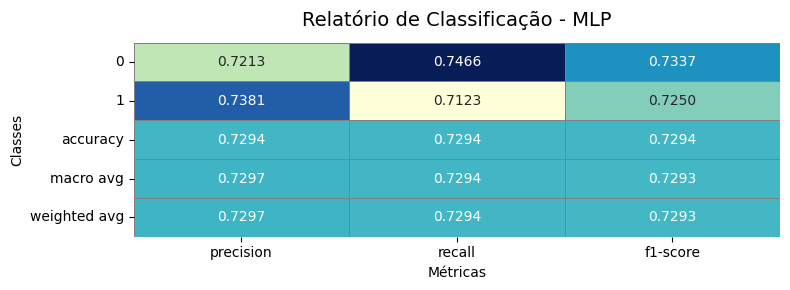

In [46]:
# Mostrar relatório de classificação
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(4)

df_display = df_report

plt.figure(figsize=(8, 3))
sns.heatmap(df_display.iloc[:, :3], annot=True, fmt=".4f", cmap="YlGnBu", cbar=False,
            linewidths=0.5, linecolor='gray')
plt.title("Relatório de Classificação - MLP", fontsize=14, pad=12)
plt.xlabel("Métricas")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

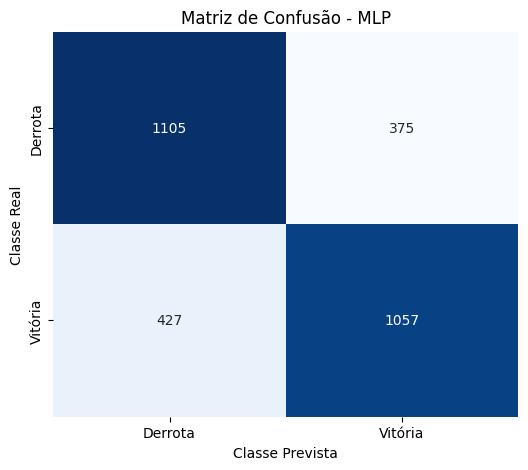

In [47]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
classes = ['Derrota', 'Vitória']

df_cm = pd.DataFrame(cm, index=classes, columns=classes)

plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - MLP')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()